In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

## Načtěte soubor covid-data.csv jako pandas dataframe. Zároveň sloupec date načtěte ve formátu datetime object přes volitelný vstup parse_dates.

In [32]:
covid_df = pd.read_csv('covid-data.csv', parse_dates = ['date'])

## Zjistěte, kolik unikátních záznamů států tabulka obsahuje.

In [35]:
len(pd.unique(covid_df.iso_code))

216

## Zjistěte, od jaký časový rozsah je v datech zachycen.

In [37]:
covid_df.date.min()
covid_df.date.max()

Timestamp('2020-11-26 00:00:00')

## Funkcemi head a tail prozkoumejte prvních a posledních 20 řádků načtené tabulky.

In [ ]:
covid_df.head(20)

# 1. Základní vykreslení
V tomto úkolu si ukážeme, jak z dat zjistit přírůstky nově zjištěných případů koronaviru v ČR na jednotlivé dny v týdnu.

## Vytvořte nový dataframe obsahující pouze údaje po čekou republiku.

In [63]:
covid_df_cze = covid_df[covid_df.iso_code == 'CZE']
covid_df_cze.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
14063,CZE,Europe,Czech Republic,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,32605.906,NaN,227.485,6.82,30.5,38.3,NaN,6.63,79.38,0.888
14064,CZE,Europe,Czech Republic,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,32605.906,NaN,227.485,6.82,30.5,38.3,NaN,6.63,79.38,0.888
14065,CZE,Europe,Czech Republic,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,...,32605.906,NaN,227.485,6.82,30.5,38.3,NaN,6.63,79.38,0.888
14066,CZE,Europe,Czech Republic,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,32605.906,NaN,227.485,6.82,30.5,38.3,NaN,6.63,79.38,0.888
14067,CZE,Europe,Czech Republic,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,32605.906,NaN,227.485,6.82,30.5,38.3,NaN,6.63,79.38,0.888


## Vykreslete průběhy nově zjištěných případů koronaviru počtu nových testů v ČR celém časovém rozsahu zachyceném v našich datech, vykreslení proveďte jednom grafu s řádným popisem os a legendou.

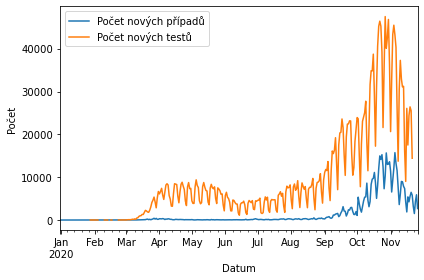

In [54]:
graf = covid_df_cze.plot('date', ['new_cases', 'new_tests',], xlabel = "Datum",
                 ylabel = "Počet", label = ["Počet nových případů",
                    "Počet nových testů"])
plt.tight_layout()
graf_k_ulozeni = ax.get_figure()
graf_k_ulozeni.savefig('carovy_graf.png')

## V našem Pandas dataframe vytvořte nový sloupec, který bude pojmenovaný tests_to_cases_ratio. Sloupec bude podílem počtu nově provedených testů a počtu nově onemocněných. Nově vzniklý sloupec opět vykreslete.

In [55]:
pd.options.plotting.backend = 'matplotlib'

In [60]:
!conda update pandas
!conda update matplotlib

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 4.8.4
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda




<ipython-input-56-b0e84a1a91a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df_cze['test_to_cases_ratio'] = covid_df_cze['new_tests']/covid_df_cze['new_cases']


<AxesSubplot:xlabel='Datum', ylabel='Poměr počtu testů ku nově nakaženým'>

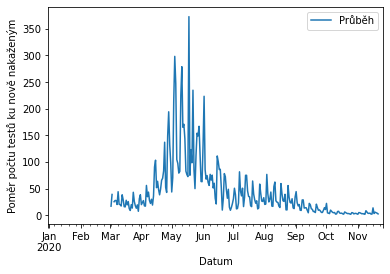

In [56]:
covid_df_cze['test_to_cases_ratio'] = covid_df_cze['new_tests']/covid_df_cze['new_cases']
covid_df_cze.plot('date', 'test_to_cases_ratio', xlabel = "Datum",
                 ylabel = 'Poměr počtu testů ku nově nakaženým', label = "Průběh")

## V našem Pandas dataframe vytvořte nový sloupec day_of_the_week tak, že získáte pro každé datum den v týdnu (tj. pondělí, úterý, středa, ...).

In [66]:
covid_df_cze['day_of_the_week'] = covid_df_cze.date.dt.day_name()
covid_df_cze.head(10)

<ipython-input-66-eef2ea0c7ce1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df_cze['day_of_the_week'] = covid_df_cze.date.dt.day_name()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,day_of_the_week
14063,CZE,Europe,Czech Republic,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,227.485,6.82,30.5,38.3,NaN,6.63,79.38,0.888,Tuesday
14064,CZE,Europe,Czech Republic,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,227.485,6.82,30.5,38.3,NaN,6.63,79.38,0.888,Wednesday
14065,CZE,Europe,Czech Republic,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,227.485,6.82,30.5,38.3,NaN,6.63,79.38,0.888,Thursday
14066,CZE,Europe,Czech Republic,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,227.485,6.82,30.5,38.3,NaN,6.63,79.38,0.888,Friday
14067,CZE,Europe,Czech Republic,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,227.485,6.82,30.5,38.3,NaN,6.63,79.38,0.888,Saturday
14068,CZE,Europe,Czech Republic,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,227.485,6.82,30.5,38.3,NaN,6.63,79.38,0.888,Sunday
14069,CZE,Europe,Czech Republic,2020-01-06,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,227.485,6.82,30.5,38.3,NaN,6.63,79.38,0.888,Monday
14070,CZE,Europe,Czech Republic,2020-01-07,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,227.485,6.82,30.5,38.3,NaN,6.63,79.38,0.888,Tuesday
14071,CZE,Europe,Czech Republic,2020-01-08,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,227.485,6.82,30.5,38.3,NaN,6.63,79.38,0.888,Wednesday
14072,CZE,Europe,Czech Republic,2020-01-09,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,227.485,6.82,30.5,38.3,NaN,6.63,79.38,0.888,Thursday


## Vytvořte nový dataframe s využitím funkce groupby, kde budou data sesumovaná podle dne v týdnu (tzn. celkový počet nových případů evidovaných pondělí, v úterý, atd.)

In [72]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
covid_df_cze_grouped_by_day = covid_df_cze.groupby('day_of_the_week').sum().reindex(day_order)
covid_df_cze_grouped_by_day.index = ['Pondělí', 'Úterý', 'Středa', 'Čtvrtek', 'Pátek', 'Sobota', 'Neděle']
covid_df_cze_grouped_by_day.head(7)

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
Pondělí,2788443.0,36815.0,70323.285,35941.0,932.0,1027.999,260383.573,3437.770,6566.761,3356.153,...,1532477.582,0.0,10691.795,320.54,1433.5,1800.1,0.0,311.61,3730.86,41.736
Úterý,2846642.0,58199.0,70948.286,37154.0,1213.0,1051.429,265818.173,5434.595,6625.118,3469.425,...,1565083.488,0.0,10919.280,327.36,1464.0,1838.4,0.0,318.24,3810.24,42.624
Středa,2929607.0,82965.0,71790.574,38438.0,1284.0,1071.288,273565.405,7747.235,6703.770,3589.322,...,1565083.488,0.0,10919.280,327.36,1464.0,1838.4,0.0,318.24,3810.24,42.624
Čtvrtek,3016621.0,87014.0,72173.574,39672.0,1234.0,1087.287,281690.735,8125.330,6739.537,3704.552,...,1565083.488,0.0,10919.280,327.36,1464.0,1838.4,0.0,318.24,3810.24,42.624
Pátek,2598631.0,87225.0,68822.142,33084.0,1023.0,982.001,242659.016,8145.032,6426.585,3089.370,...,1532477.582,0.0,10691.795,320.54,1433.5,1800.1,0.0,311.61,3730.86,41.736
Sobota,2687407.0,88776.0,69651.860,34133.0,1049.0,1003.004,250948.881,8289.864,6504.060,3187.326,...,1532477.582,0.0,10691.795,320.54,1433.5,1800.1,0.0,311.61,3730.86,41.736
Neděle,2751628.0,64221.0,70107.142,35009.0,876.0,1013.571,256945.806,5996.930,6546.573,3269.126,...,1532477.582,0.0,10691.795,320.54,1433.5,1800.1,0.0,311.61,3730.86,41.736


## Zobrazte  celkové počty nových případů a nově udělaných testů v jednotlivých dnech týdne jako řádně popsaný sloupcový graf.

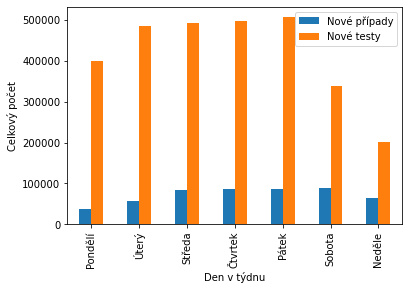

In [75]:
ax = covid_df_cze_grouped_by_day.plot.bar(y = ['new_cases', 'new_tests'], xlabel = 'Den v týdnu',
                                         ylabel = 'Celkový počet', label = ['Nové případy', 'Nové testy'])
graf_k_ulozeni = ax.get_figure()
graf_k_ulozeni.savefig('sloupcovy_graf.png')

# 2. Boxploty

![Boxplot](boxplot.png)

## Vyberte data pouze z 1. listopadu 2020

In [78]:
covid_df_2020_11_01 = covid_df[covid_df.date == '2020-11-01']
covid_df_2020_11_01.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
306,AFG,Asia,Afghanistan,2020-11-01,41501.0,76.0,104.714,1536.0,0.0,3.571,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.498
569,ALB,Europe,Albania,2020-11-01,20875.0,241.0,288.143,509.0,7.0,5.143,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
901,DZA,Africa,Algeria,2020-11-01,57942.0,291.0,294.571,1964.0,8.0,8.143,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.754
1165,AND,Europe,Andorra,2020-11-01,4756.0,91.0,102.571,75.0,0.0,0.857,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.858
1415,AGO,Africa,Angola,2020-11-01,10558.0,289.0,247.000,279.0,4.0,2.000,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
1660,AIA,North America,Anguilla,2020-11-01,3.0,0.0,0.000,NaN,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.88,NaN
1912,ATG,North America,Antigua and Barbuda,2020-11-01,128.0,1.0,0.571,3.0,0.0,0.000,...,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.80,77.02,0.780
2179,ARG,South America,Argentina,2020-11-01,1166911.0,9745.0,12226.857,31002.0,210.0,341.286,...,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.825
2511,ARM,Asia,Armenia,2020-11-01,92254.0,2441.0,2059.571,1363.0,22.0,26.143,...,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.20,75.09,0.755
2765,ABW,North America,Aruba,2020-11-01,4513.0,41.0,14.714,38.0,1.0,0.286,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


## Vytvořte boxplot počtu nemocničních postelí na 1000 obyvatel dle jednotlivých kontinentů k 1. listopadu 2020. Boxplot následně uložte ve formátu png.

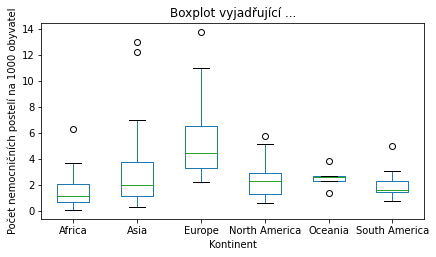

In [86]:
ax = covid_df_2020_11_01.boxplot(column = 'hospital_beds_per_thousand', by = 'continent',
                           grid = False)
plt.tight_layout()
ax.set_xlabel('Kontinent')
ax.set_ylabel('Počet nemocničních postelí na 1000 obyvatel')
ax.set_title('Boxplot vyjadřující ...')
plt.suptitle('')
fig = ax.get_figure()
fig.savefig('boxplot_postele.png')

## Nyní se podíváme, jak jsou na tom různé kontinenty s umýváním rukou. Vtvořte stejný graf, pouze místo nemocníčních postelí zobraze zařízení na umývaní rukou (handwashing_facilities).

# 3. Korelační analýza

## Načtěte data pouze ze dne 1. září 2020.

In [88]:
covid_df_2020_09_01 = covid_df[covid_df.date == '2020-09-01']
covid_df_2020_09_01.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
245,AFG,Asia,Afghanistan,2020-09-01,38196.0,34.0,18.000,1406.0,4.0,1.286,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.498
508,ALB,Europe,Albania,2020-09-01,9513.0,133.0,129.714,284.0,4.0,4.286,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
840,DZA,Africa,Algeria,2020-09-01,44494.0,348.0,376.571,1510.0,9.0,9.143,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.754
1104,AND,Europe,Andorra,2020-09-01,1176.0,52.0,16.571,53.0,0.0,0.000,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.858
1354,AGO,Africa,Angola,2020-09-01,2624.0,0.0,57.429,107.0,0.0,1.000,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581


## Vyberte pouze následující sloupce:
* total_deaths_per_million
* hospital_beds_per_thousand
* total_tests_per_thousand
* population_density
* gdp_per_capita
* life_expectancy

In [89]:
covid_df_for_corr = covid_df_2020_09_01[
    ['total_deaths_per_million',
    'hospital_beds_per_thousand',
    'total_tests_per_thousand',
    'population_density',
    'gdp_per_capita',
    'life_expectancy']
]
covid_df_for_corr.head()

,total_deaths_per_million,hospital_beds_per_thousand,total_tests_per_thousand,population_density,gdp_per_capita,life_expectancy
245,36.118,0.50,NaN,54.422,1803.987,64.83
508,98.686,2.89,NaN,104.871,11803.431,78.57
840,34.435,1.90,NaN,17.348,13913.839,76.88
1104,685.951,NaN,NaN,163.755,NaN,83.73
1354,3.256,NaN,NaN,23.890,5819.495,61.15


## Vytvořte příkazem v knihovně Pandas korelační matici pro náš výběr sloupců.

In [90]:
corr_mat = covid_df_for_corr.corr()
corr_mat

,total_deaths_per_million,hospital_beds_per_thousand,total_tests_per_thousand,population_density,gdp_per_capita,life_expectancy
total_deaths_per_million,1.000000,0.035904,0.102531,-0.043298,0.292373,0.383454
hospital_beds_per_thousand,0.035904,1.000000,0.152307,0.315059,0.297093,0.472007
total_tests_per_thousand,0.102531,0.152307,1.000000,0.310888,0.682895,0.442309
population_density,-0.043298,0.315059,0.310888,1.000000,0.315470,0.220679
gdp_per_capita,0.292373,0.297093,0.682895,0.315470,1.000000,0.689773
life_expectancy,0.383454,0.472007,0.442309,0.220679,0.689773,1.000000


## Využijte navrženou funkci pro barevné zobrazení vypočtené korelační matice.

In [96]:
def corr_matrix_visualisation(pandas_correlation_df):
    '''
    Funkce vizualizuje korelační matici.
    Input: pandas correlation dataframe

    '''
    f = plt.figure(figsize=(13, 10))
    #vykresleni samotne korelacni matice
    plt.matshow(pandas_correlation_df, fignum=f.number, cmap = "seismic", vmin = -1, vmax = 1)
    #popisky jednotlivych radku a sloupcu
    plt.xticks(range(pandas_correlation_df.shape[1]), pandas_correlation_df.columns, fontsize=14, rotation=45)
    plt.yticks(range(pandas_correlation_df.shape[1]), pandas_correlation_df.columns, fontsize=14)
    cb = plt.colorbar() # vykresleni barevne skaly
    cb.ax.tick_params(labelsize=14)
    #nazev
    plt.title('Pearsonova korelace dat z tabulky', fontsize=16)

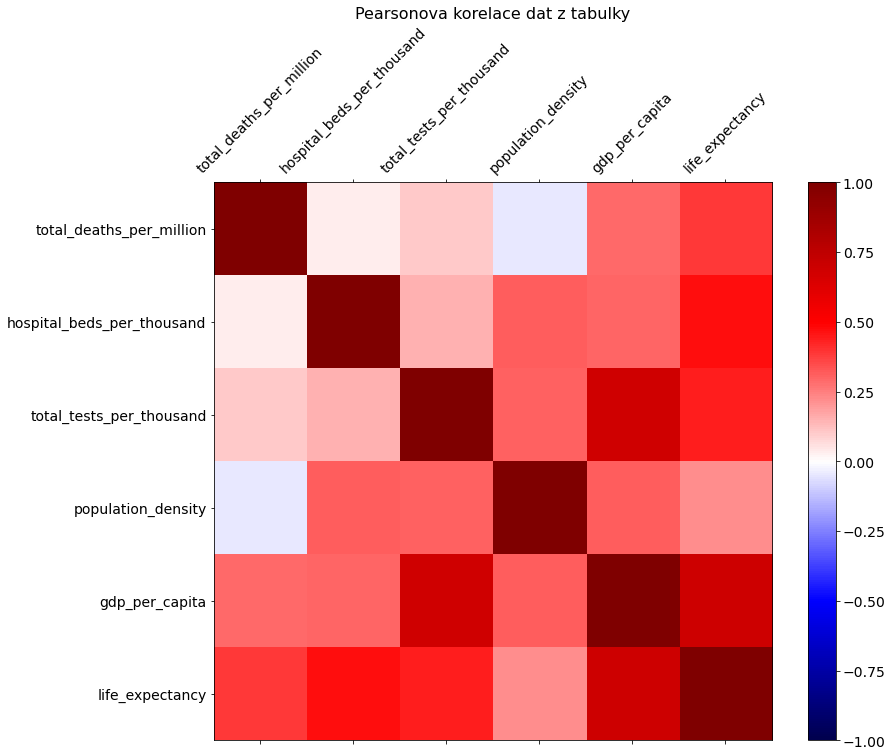

In [97]:
corr_matrix_visualisation(corr_mat)

# 4. Mapy

## Načtěte data pouze ze dne 25. listopadu 2020.

In [98]:
covid_df_2020_11_25 = covid_df[covid_df.date == '2020-11-25']

## S využitím knihovny geopandas načtěte mapu světa.

In [100]:
world_map = gpd.read_file('Map\\ne_110m_admin_0_countries.shp')
world_map.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Fiji,斐濟,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,...,서사하라,Westelijke Sahara,Sahara Zachodnia,Saara Ocidental,Западная Сахара,Västsahara,Batı Sahra,Tây Sahara,西撒哈拉,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,캐나다,Canada,Kanada,Canadá,Канада,Kanada,Kanada,Canada,加拿大,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,United States of America,USA,...,미국,Verenigde Staten van Amerika,Stany Zjednoczone,Estados Unidos,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


## Mapu světa zobrazte

<AxesSubplot:>

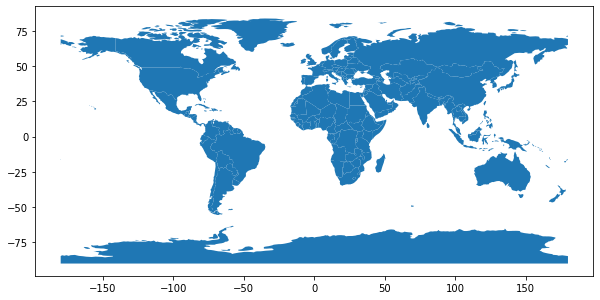

In [101]:
world_map.plot(figsize = (10, 8))

In [105]:
def plot_map(data_dataframe, map_dataframe, variable, min_value, max_value, title = "World map", colormap = "Reds"):
    """
    Funkce pro vykreslení mapy dat z COVID dataset.
    Inputs:
    data_dataframe  pandas dataframe
    map_dataframe   geopandas dataframe
    variable    sloupec, string
    min_value   minimalni hodnota colormapy, float
    max_value   maximalni hodnota colormapy, float
    title   nazev gramu, string
    colormap    matplotlib colormap, string
    """
    #spojeni obou dataframe podle iso hodnoty statu
    merged_df = map_dataframe.set_index('ADM0_A3').join(data_dataframe.set_index('iso_code'))
    # zaozeni matplotlib figure
    fig, ax = plt.subplots(1, figsize=(15, 8))
    ax.axis('off')
    #vypsani jmena grafu
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'})
    #vykresleni
    merged_df.plot(column=variable, cmap=colormap, linewidth=0.8, ax=ax, vmin = min_value, vmax = max_value, edgecolor='0.8')
    # vytvoreni barevne skaly
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=min_value, vmax=max_value))
    sm._A = []
    cbar = fig.colorbar(sm)
    plt.tight_layout()

## Vykreslete do mapy počet nových úmrtí spojených s covidem ve dne 25. 11. 2020 s využitím navržené funkce

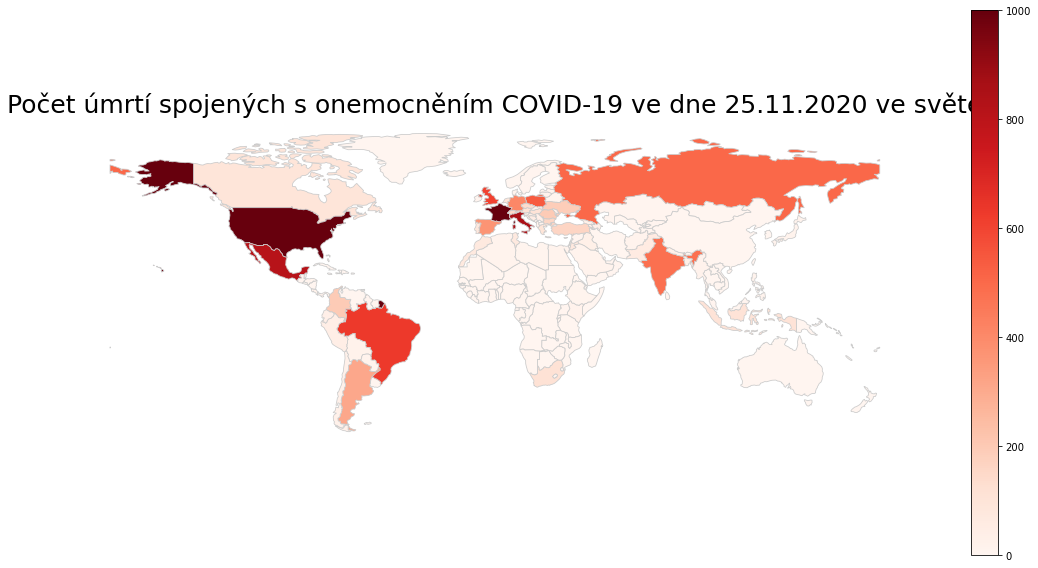

In [107]:
plot_map(covid_df_2020_11_25, world_map, 'new_deaths', min_value = 0, max_value = 1000,
        title = 'Počet úmrtí spojených s onemocněním COVID-19 ve dne 25.11.2020 ve světě')
plt.tight_layout()